In [1]:
import os
import sys
LIB_PATH = os.path.dirname(os.getcwd())
sys.path.append(LIB_PATH)

In [2]:
import cv2

In [3]:
DIRECTORY_DATA = os.path.join(LIB_PATH, 'data')
DIRECTORY_OUTPUT = os.path.join(LIB_PATH, 'output')

In [4]:
image_filepaths = [os.path.join(
    DIRECTORY_DATA, name) for name in os.listdir(DIRECTORY_DATA)
]

In [5]:
for i in range(0, len(image_filepaths)+2, 2):
    print(i)
    test_paths = image_filepaths[i-2:i]
    to_stitch = []
    for path in test_paths:
        img = cv2.imread(path)
        to_stitch.append(img)
    stitcher = cv2.Stitcher_create()
    (status, stitched) = stitcher.stitch(to_stitch)
    if status == 0:
        name, ext = path.split('.')
        fullpath = name + '_stitched.' + ext
        fullpath = fullpath.replace(DIRECTORY_DATA, DIRECTORY_OUTPUT)
        print(fullpath)
        cv2.imwrite(fullpath, stitched)
        cv2.imshow('Stitched: ', stitched)


0
2
E:\Program Files\Dropbox\Yuan Qing\NTU MSAI\AI6121\project\output\image pairs_01_02_stitched.jpg
4
E:\Program Files\Dropbox\Yuan Qing\NTU MSAI\AI6121\project\output\image pairs_02_02_stitched.png
6
E:\Program Files\Dropbox\Yuan Qing\NTU MSAI\AI6121\project\output\image pairs_03_02_stitched.jpg
8
E:\Program Files\Dropbox\Yuan Qing\NTU MSAI\AI6121\project\output\image pairs_04_02_stitched.jpg


In [6]:
for i in range(0, len(image_filepaths)+2, 2):
    print(i)
    test_paths = image_filepaths[i-2:i]
    to_stitch = []
    for path in test_paths:
        img = cv2.imread(path)
        to_stitch.append(img)
    #sift_obj = cv2.xfeatures2d.SIFT_create()
    

0
2
4
6
8


In [7]:
img = cv2.imread(image_filepaths[0])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img2 = cv2.imread(image_filepaths[1])
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [8]:
sift_obj = cv2.xfeatures2d.SIFT_create()
keypoints, descriptors = sift_obj.detectAndCompute(img, None)

sift_obj = cv2.xfeatures2d.SIFT_create()
keypoints2, descriptors2 = sift_obj.detectAndCompute(img2, None)

In [9]:
descriptors

array([[ 32.,   4.,   5., ...,   0.,   0.,   0.],
       [  6.,   2.,   2., ...,   0.,   0.,   0.],
       [  1.,   1.,   2., ...,   0.,   0.,   0.],
       ...,
       [  2.,   2.,  15., ...,   0.,   0.,   1.],
       [  0.,   0.,   3., ...,   2.,   6.,   0.],
       [ 84.,   1.,   2., ...,  86., 107.,  40.]], dtype=float32)

In [10]:
type(sift_obj)

cv2.SIFT

In [11]:
annotated = cv2.drawKeypoints(gray, keypoints,img)
annotated2 = cv2.drawKeypoints(gray2, keypoints2,img2)

In [12]:
print(type(annotated))

<class 'numpy.ndarray'>


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

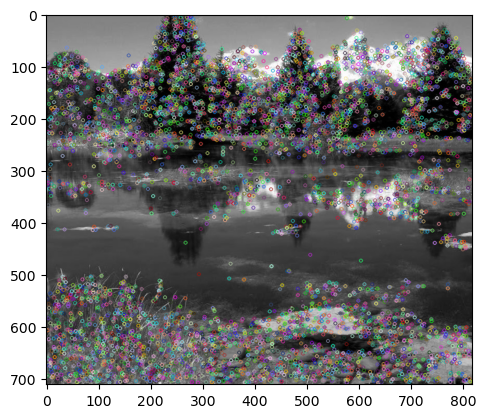

In [14]:
plt.imshow(annotated)


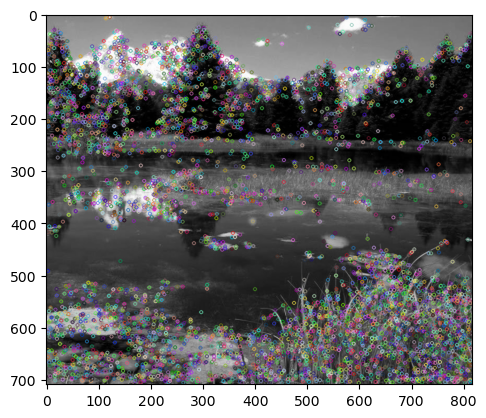

In [15]:
plt.imshow(img2)

In [16]:
#-- Step 2: Matching descriptor vectors with a FLANN based matcher
# Since SURF is a floating-point descriptor NORM_L2 is used
matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
knn_matches = matcher.knnMatch(descriptors, descriptors2, 2)

In [17]:
type(descriptors)

numpy.ndarray

In [18]:
type(knn_matches)

tuple

In [19]:
import numpy as np
#-- Filter matches using the Lowe's ratio test
ratio_thresh = 0.7
good_matches = []
for m,n in knn_matches:
    if m.distance < ratio_thresh * n.distance:
        good_matches.append(m)
#-- Draw matches
img_matches = np.empty((max(img.shape[0], img2.shape[0]), img.shape[1]+img2.shape[1], 3), dtype=np.uint8)
cv2.drawMatches(img, keypoints, img2, keypoints2, good_matches, img_matches, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#-- Show detected matches
cv2.imshow('Good Matches', img_matches)

In [20]:
good_matches

[< cv2.DMatch 000002A64F1F46F0>,
 < cv2.DMatch 000002A64F202BB0>,
 < cv2.DMatch 000002A64F21E8F0>,
 < cv2.DMatch 000002A64F222770>,
 < cv2.DMatch 000002A64F230FB0>,
 < cv2.DMatch 000002A64F2329B0>,
 < cv2.DMatch 000002A64F232AB0>,
 < cv2.DMatch 000002A64F232C70>,
 < cv2.DMatch 000002A64F232CF0>,
 < cv2.DMatch 000002A64F232DF0>,
 < cv2.DMatch 000002A64F232E30>,
 < cv2.DMatch 000002A64F232EF0>,
 < cv2.DMatch 000002A64F232F70>,
 < cv2.DMatch 000002A64F234070>,
 < cv2.DMatch 000002A64F234130>,
 < cv2.DMatch 000002A64F234170>,
 < cv2.DMatch 000002A64F2341B0>,
 < cv2.DMatch 000002A64F2341F0>,
 < cv2.DMatch 000002A64F234230>,
 < cv2.DMatch 000002A64F2342B0>,
 < cv2.DMatch 000002A64F2342F0>,
 < cv2.DMatch 000002A64F234330>,
 < cv2.DMatch 000002A64F234370>,
 < cv2.DMatch 000002A64F2343B0>,
 < cv2.DMatch 000002A64F2343F0>,
 < cv2.DMatch 000002A64F2344B0>,
 < cv2.DMatch 000002A64F2344F0>,
 < cv2.DMatch 000002A64F234530>,
 < cv2.DMatch 000002A64F234570>,
 < cv2.DMatch 000002A64F2345B0>,
 < cv2.DMa

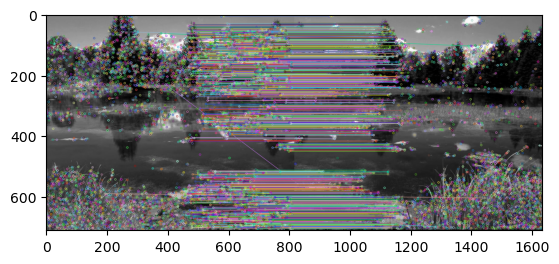

In [21]:
plt.imshow(img_matches)

In [22]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10
img1 = cv.imread('box.png', cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('box_in_scene.png', cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\features2d\src\sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'cv::SIFT_Impl::detectAndCompute'


In [ ]:
H, __ = cv2.findHomography(srcPoints, dstPoints, cv2.RANSAC, 4)